In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

!pip install https://s3.amazonaws.com/h2o-release/datatable/stable/datatable-0.8.0/datatable-0.8.0-cp36-cp36m-linux_x86_64.whl


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import RobustScaler

import plotly.express as px


Using TensorFlow backend.


In [3]:
os.chdir("../soheil")

dictionary = pd.read_excel('LCDataDictionary.xlsx').dropna()
dictionary.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [5]:
#import datatable as dt

#loan = dt.fread("../input/lending-club-loan-data/loan.csv")
loan = pd.read_csv('loan.csv')

In [7]:
loan.shape

(2260668, 145)

In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#pd.set_option("max_rows", None)
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
id                                            float64
member_id                                     float64
loan_amnt                                     int64
funded_amnt                                   int64
funded_amnt_inv                               float64
term                                          object
int_rate                                      float64
installment                                   float64
grade                                         object
sub_grade                                     object
emp_title                                     object
emp_length                                    object
home_ownership                                object
annual_inc                                    float64
verification_status                           object
issue_d                                       object
loan_status                       

In [10]:
#Show all columns
pd.set_option('display.max_columns', 500)
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,39.303090,7.024194e+00,35.782223,5.002082e-01,3.67

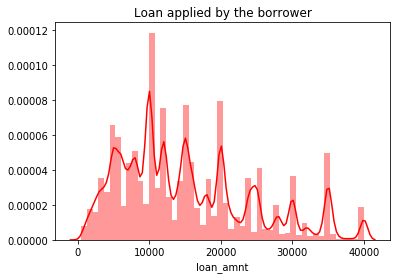

In [11]:
plt.title("Loan applied by the borrower")
sns.distplot(loan['loan_amnt'], color='red')
plt.show()

loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values



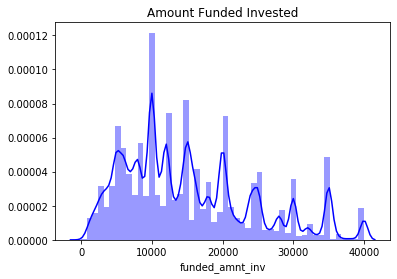

In [12]:
plt.title("Amount Funded Invested")
sns.distplot(loan['funded_amnt_inv'], color='blue')
plt.show()


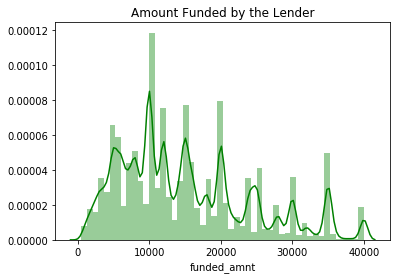

In [13]:
plt.title("Amount Funded by the Lender")
sns.distplot(loan['funded_amnt'], color='green')
plt.show()

In [14]:
loan['issue_date'] = pd.to_datetime(loan['issue_d'])
loan['year'] = loan['issue_date'].dt.year

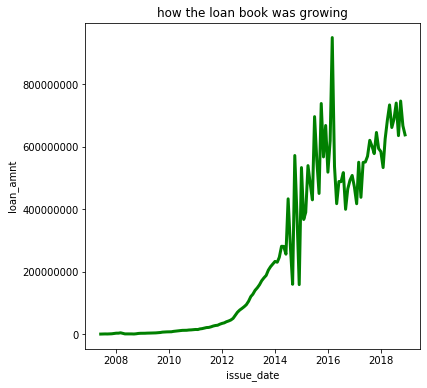

In [15]:
plt.figure(figsize = (6,6))
plt.axis(option='normal')
plt.title("how the loan book was growing")
sns.lineplot(x="issue_date", y="loan_amnt", data=loan, estimator='sum' , ci=None, color = 'green', lw=3)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [16]:
#Loan funded in each year
loan[['funded_amnt', 'year']].groupby(['year'], as_index=False).mean().sort_values(by='year', ascending=False)

,year,funded_amnt
11,2018,16025.020394
10,2017,14845.060463
9,2016,14733.974591
8,2015,15240.285862
7,2014,14870.156793
6,2013,14707.371267
5,2012,13452.932055
4,2011,11848.609640
3,2010,10078.262343
2,2009,9811.541375


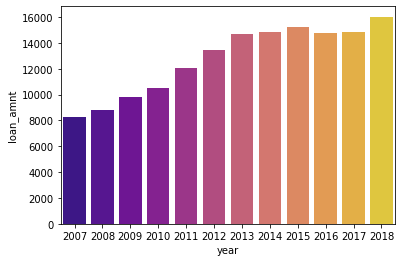

In [17]:
#Loan funded vs year

sns.barplot(x="year", y="loan_amnt", ci =None, data=loan,palette='plasma')
plt.show()

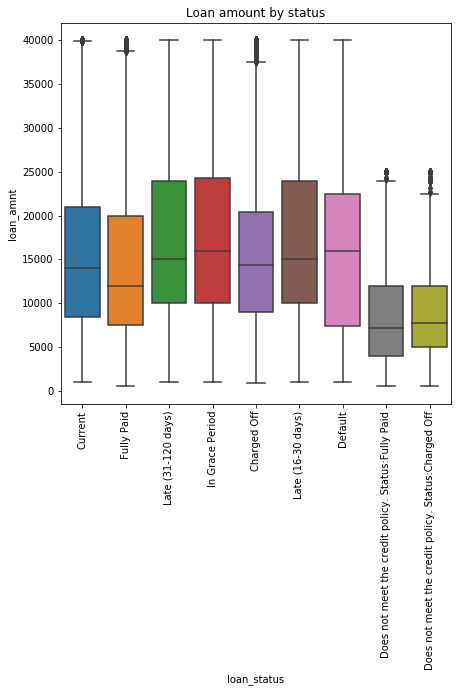

In [18]:
#Loan amount by status
plt.figure(figsize=(7,7))
plt.title("Loan amount by status")
plt.xticks(rotation=90)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan)
plt.show()

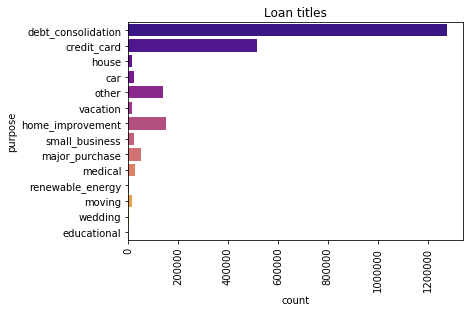

In [19]:
#Loan purpose

plt.title("Loan titles")
plt.xticks(rotation=90)
sns.countplot(y="purpose", data=loan,  palette = 'plasma')
plt.show()

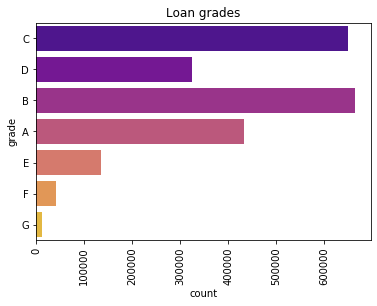

In [20]:
#Loan grade
#Here is the overview of the occurrence of loans of different grades:

plt.title("Loan grades")
plt.xticks(rotation=90)
sns.countplot(y="grade", data=loan,  palette = 'plasma')
plt.show()

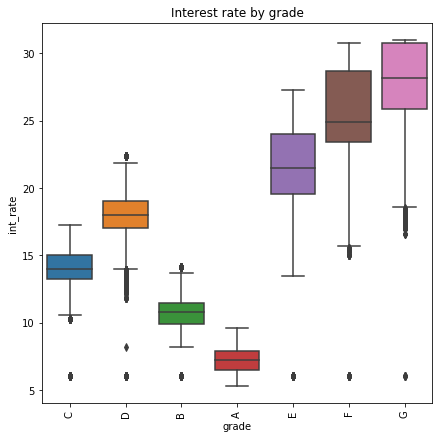

In [21]:
#Loan amount by status
plt.figure(figsize=(7,7))
plt.title("Interest rate by grade")
plt.xticks(rotation=90)
sns.boxplot(x="grade", y="int_rate", data=loan)
plt.show()

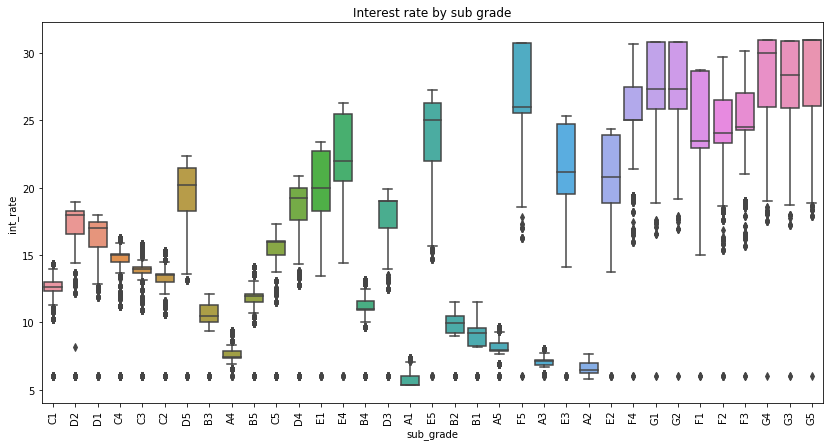

In [22]:
#Loan amount by status
plt.figure(figsize=(14,7))
plt.title("Interest rate by sub grade")
plt.xticks(rotation=90)
sns.boxplot(x="sub_grade", y="int_rate", data=loan)
plt.show()

# Type of Loans

In [23]:
loan.loan_status.value_counts(ascending=False)

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [24]:
loan.loan_status.sample(10)

550085        Current
2177118       Current
1999767    Fully Paid
456089        Current
66650         Current
875469     Fully Paid
1588205       Current
1334200    Fully Paid
1346243    Fully Paid
2023789    Fully Paid
Name: loan_status, dtype: object

In [25]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

loan['loan_condition'] = np.nan

loan['loan_condition'] = np.where(((loan['loan_status']=='Charged Off') 
                                  | (loan['loan_status']=='Default') 
                                  
                                  |(loan['loan_status']=='Does not meet the credit policy. Status:Charged Off')  
                                  |   (loan['loan_status']=='In Grace Period')
                                  | (loan['loan_status']=='Late (16-30 days)')
                                   |  (loan['loan_status']=='Late (31-120 days)'))
                                   , 'bad_loan', 'good_loan')

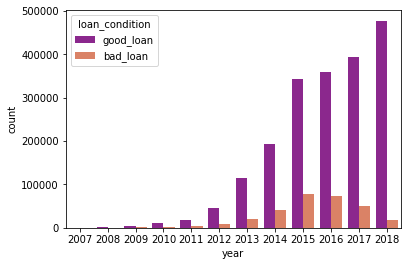

In [26]:
sns.countplot(x="year", hue="loan_condition", data=loan, palette='plasma')
plt.show()

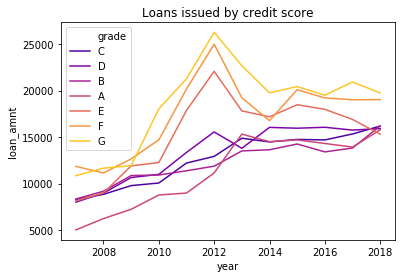

In [27]:
plt.title("Loans issued by credit score")
sns.lineplot(x="year", y="loan_amnt", hue="grade", data=loan,palette ='plasma', ci=None)
plt.show()

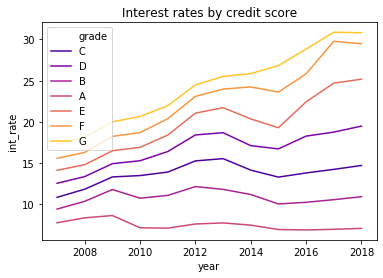

In [28]:
plt.title("Interest rates by credit score")
sns.lineplot(x="year", y="int_rate", hue="grade", data=loan,palette ='plasma', ci=None)
plt.show()

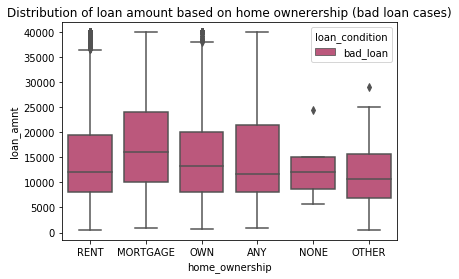

In [29]:
plt.title("Distribution of loan amount based on home ownerership (bad loan cases)")
sns.boxplot(x='home_ownership' , y= 'loan_amnt',hue='loan_condition', hue_order =['bad_loan'] ,data= loan, palette ='plasma')
plt.show()


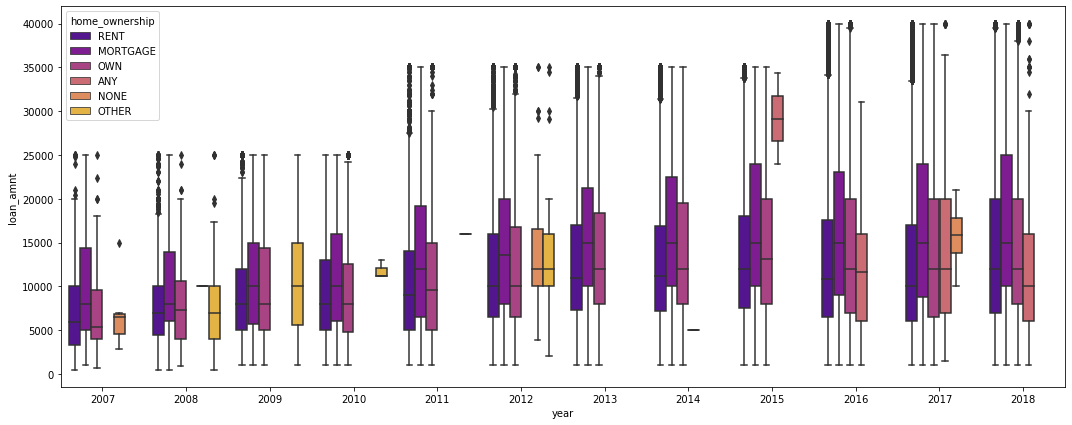

In [30]:
plt.figure(figsize= (18,7))
sns.boxplot(y='loan_amnt' ,x='year', hue= 'home_ownership',palette = 'plasma' ,data= loan)
plt.show()

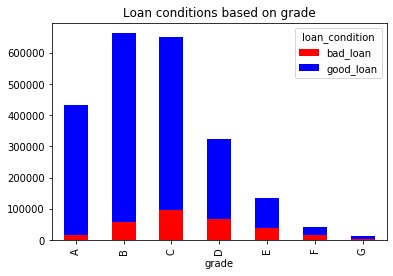

In [31]:
loan_plot = loan.groupby(['grade', 'loan_condition']).size().reset_index().pivot(columns='loan_condition', index='grade', values=0)
loan_plot.plot(kind='bar', stacked=True, color='rb')
plt.title("Loan conditions based on grade")
plt.show()

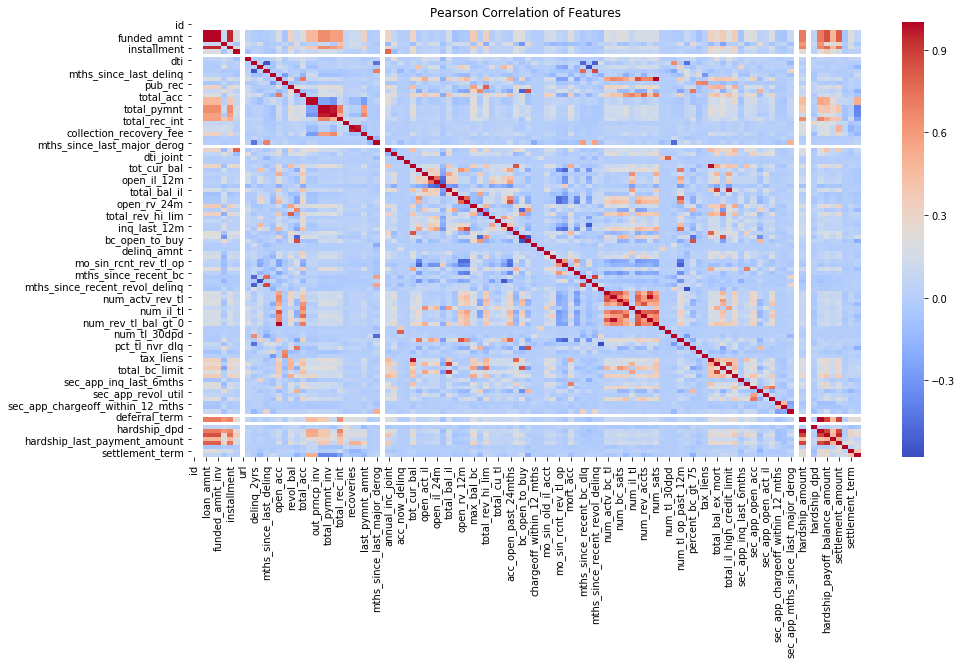

In [32]:
#Correlation Matrix
plt.figure(figsize=(15, 8))
plt.title('Pearson Correlation of Features')
sns.heatmap(loan.corr(),cmap='coolwarm' )
plt.show()

# **Feature Engineering**

In [33]:
'''Remove redundant features, and keep important ones

loan_condition : good loan or bad loan (TARGET)

loan_amnt : The listed amount of the loan applied for by the borrower. 
int_rate : Interest Rate on the loan
grade : Grade of employment
emp_length : Employment length in years. 
home_ownership : Type of ownership of house
annual_inc : Total annual income
term : 36-month or 60-month period'''

'Remove redundant features, and keep important ones\n\nloan_condition : good loan or bad loan (TARGET)\n\nloan_amnt : The listed amount of the loan applied for by the borrower. \nint_rate : Interest Rate on the loan\ngrade : Grade of employment\nemp_length : Employment length in years. \nhome_ownership : Type of ownership of house\nannual_inc : Total annual income\nterm : 36-month or 60-month period'

In [34]:
loan_features = loan[['loan_amnt','int_rate','grade', 'emp_length','home_ownership','annual_inc','term','loan_condition']]

In [35]:
loan_features['term'] = loan_features['term'].map(lambda x: x.rstrip(' months')).astype(int)

In [36]:
loan_features['emp_length'] = loan_features['emp_length'].str.lstrip('<').str.rstrip('+ years')

In [37]:
#Missing Values:

loan_features.isnull().sum().sort_values(ascending = False)

emp_length        146907
annual_inc             4
loan_condition         0
term                   0
home_ownership         0
grade                  0
int_rate               0
loan_amnt              0
dtype: int64

In [38]:
# change outcomes to Integer values
# Good bad to 0
# Bad loan to 1
loan_features['loan_condition'] = loan_features['loan_condition'].map({'good_loan':0, 'bad_loan':1})

In [39]:
# Remove every row with missing values.
# There are mostly rows where emp_length is NaN.

loan_features.dropna(inplace = True)


In [40]:
#Change employee length from string to int type
loan_features['emp_length'] = loan_features['emp_length'].astype(int)


In [41]:
y = loan_features['loan_condition']

In [42]:
#Convert categorical variable into dummy/indicator variables.
X_dummy = pd.get_dummies(loan_features.drop(['loan_condition'], axis=1), drop_first=True)


In [43]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummy)

# Prepare the data for Machine Learning algorithms

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_df, y):
    train_strat = X_df.loc[train_index]
    test_strat = X_df.loc[test_index]


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_df, loan_features['loan_condition']):
    X_train, X_test = X_df[train_index], X_df[test_index]
    y_train, y_test = loan_features['loan_condition'][train_index], loan_features['loan_condition'][test_index]

from collections import Counter

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_df, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [44]:
model ={'Decision Tree':DecisionTreeClassifier( max_depth=2,min_samples_leaf =10, random_state=0, class_weight='balanced'),
       'Random Forest Classifier': RandomForestClassifier(n_jobs=-1, max_depth=2, random_state=0, class_weight='balanced'),
       'Logistic Regression': LogisticRegression(n_jobs=-1, random_state=0, class_weight='balanced')}

for keys, items in model.items():
    cv_results = cross_validate(items, X_scaled, y, cv=5, scoring='roc_auc')
    print(model.keys())
    print("AUC:  ", cv_results['test_score'])
    print("max AUC:  ", max(cv_results['test_score']))
    print("average AUC:  ", np.mean(cv_results['test_score']),"\n")


dict_keys(['Decision Tree', 'Random Forest Classifier', 'Logistic Regression'])
AUC:   [0.6528666  0.655273   0.68070363 0.66173073 0.65846418]
max AUC:   0.6807036291537483
average AUC:   0.6618076268392246 

dict_keys(['Decision Tree', 'Random Forest Classifier', 'Logistic Regression'])
AUC:   [0.66121701 0.68394243 0.69379626 0.67373503 0.68936528]
max AUC:   0.6937962620537574
average AUC:   0.6804112047584121 

dict_keys(['Decision Tree', 'Random Forest Classifier', 'Logistic Regression'])
AUC:   [0.69319176 0.69676481 0.68762082 0.6577966  0.69015306]
max AUC:   0.6967648077035371
average AUC:   0.6851054106194715 



# Using Keras

In [45]:
import keras
keras.__version__

'2.3.1'

In [46]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [47]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

model.compile(loss='binary_crossentropy', optimizer='RMSprop',metrics=[ auroc])


In [48]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)


history = model.fit(X_scaled,y, epochs=10, batch_size=512, validation_split=0.2, class_weight = class_weights)

Instructions for updating:
Use tf.cast instead.
Train on 1691005 samples, validate on 422752 samples
Epoch 1/10
1691005/1691005 [==============================] - 17s 10us/step - loss: 0.3648 - auroc: 0.6609 - val_loss: 0.3930 - val_auroc: 0.6798
Epoch 2/10
1691005/1691005 [==============================] - 17s 10us/step - loss: 0.3527 - auroc: 0.6884 - val_loss: 0.3924 - val_auroc: 0.6784
Epoch 3/10
1691005/1691005 [==============================] - 16s 10us/step - loss: 0.3517 - auroc: 0.6916 - val_loss: 0.3926 - val_auroc: 0.6769
Epoch 4/10
1691005/1691005 [==============================] - 16s 10us/step - loss: 0.3516 - auroc: 0.6920 - val_loss: 0.3925 - val_auroc: 0.6781
Epoch 5/10
1691005/1691005 [==============================] - 16s 10us/step - loss: 0.3516 - auroc: 0.6923 - val_loss: 0.3930 - val_auroc: 0.6775
Epoch 6/10
1691005/1691005 [==============================] - 16s 10us/step - loss: 0.3516 - auroc: 0.6923 - val_loss: 0.3926 - val_auroc: 0.6782
Epoch 7/10
1691005/1691